In [ ]:
from tensorflow.python.client import device_lib
 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4974578349416374555, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15703311680
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12730043321828008811
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

# load dfset
drive.mount('/drive')   #mount the drive to load 

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
PATH_DATA = '.../EURUSD1.csv'

data = pd.read_csv(PATH_DATA, names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
data

,Date,Time,Open,High,Low,Close,Volume
0,2004.07.29,08:53,1.20270,1.20300,1.20220,1.20230,10
1,2004.07.29,08:54,1.20270,1.20280,1.20210,1.20220,9
2,2004.07.29,08:55,1.20260,1.20290,1.20230,1.20270,9
3,2004.07.29,08:56,1.20240,1.20260,1.20210,1.20230,9
4,2004.07.29,08:57,1.20220,1.20260,1.20170,1.20230,12
...,...,...,...,...,...,...,...
6001881,2021.01.28,20:30,1.21291,1.21302,1.21289,1.21295,72
6001882,2021.01.28,20:31,1.21297,1.21299,1.21289,1.21292,35
6001883,2021.01.28,20:32,1.21291,1.21291,1.21283,1.21283,22
6001884,2021.01.28,20:33,1.21284,1.21288,1.21269,1.21271,78


In [ ]:
# Merge date and time into one column and convert its datatype into datatime
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.drop(columns=['Date', 'Time'])
data = data[['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume']]
data['Volume'] = data['Volume'].astype('float')
data

,Datetime,Open,High,Low,Close,Volume
0,2004-07-29 08:53:00,1.20270,1.20300,1.20220,1.20230,10.0
1,2004-07-29 08:54:00,1.20270,1.20280,1.20210,1.20220,9.0
2,2004-07-29 08:55:00,1.20260,1.20290,1.20230,1.20270,9.0
3,2004-07-29 08:56:00,1.20240,1.20260,1.20210,1.20230,9.0
4,2004-07-29 08:57:00,1.20220,1.20260,1.20170,1.20230,12.0
...,...,...,...,...,...,...
6001881,2021-01-28 20:30:00,1.21291,1.21302,1.21289,1.21295,72.0
6001882,2021-01-28 20:31:00,1.21297,1.21299,1.21289,1.21292,35.0
6001883,2021-01-28 20:32:00,1.21291,1.21291,1.21283,1.21283,22.0
6001884,2021-01-28 20:33:00,1.21284,1.21288,1.21269,1.21271,78.0


In [ ]:
# Use an subset of data 
#
START_DATE = '2010-01-01'
END_DATE = '2011-01-01'
data = data.loc[(data['Datetime'] >= START_DATE) & (data['Datetime'] <= END_DATE)]
data

,Datetime,Open,High,Low,Close,Volume
1902994,2010-01-03 23:00:00,1.43259,1.43259,1.43213,1.43222,28.0
1902995,2010-01-03 23:01:00,1.43227,1.43242,1.43223,1.43241,12.0
1902996,2010-01-03 23:02:00,1.43234,1.43244,1.43231,1.43235,22.0
1902997,2010-01-03 23:03:00,1.43236,1.43237,1.43231,1.43231,5.0
1902998,2010-01-03 23:04:00,1.43232,1.43235,1.43225,1.43235,14.0
...,...,...,...,...,...,...
2270113,2010-12-31 21:43:00,1.33813,1.33887,1.33805,1.33805,10.0
2270114,2010-12-31 21:44:00,1.33848,1.33849,1.33843,1.33843,4.0
2270115,2010-12-31 21:45:00,1.33803,1.33863,1.33801,1.33816,11.0
2270116,2010-12-31 21:46:00,1.33795,1.33867,1.33794,1.33833,6.0


In [ ]:
# Split data into train and test
# 80% Training : 20% Test
TRAIN_TEST_RATIO = 0.8
TRAIN_TEST_INDEX = int(data.shape[0] * TRAIN_TEST_RATIO)
TRAIN_TEST_INDEX

train, test = data.iloc[0:TRAIN_TEST_INDEX], data.iloc[TRAIN_TEST_INDEX:]
print('train shape: {}'.format(train.shape))
print('test shape: {}'.format(test.shape))

train shape: (293699, 6)
test shape: (73425, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train[['Close']])
train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
TIME_STEPS = 30

def create_dataset(X, time_steps=1):
    Xs = [] 
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
    return np.array(Xs)

X_train = create_dataset(train[['Close']], TIME_STEPS)
print('X_train shape: {}'.format(X_train.shape))

X_train shape: (293669, 30, 1)


In [ ]:
X_test = create_dataset(test[['Close']], TIME_STEPS)
print('X_test shape: {}'.format(X_test.shape))

X_test shape: (73395, 30, 1)


In [ ]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf


# encoder
latent_dim = 2
inter_dim = 32

def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0] 
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

# timesteps, features
timesteps = TIME_STEPS
features = X_train.shape[2]
input_x = Input(shape= (timesteps, features)) 

#intermediate dimension 
h = LSTM(inter_dim)(input_x)

#z_layer
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)
z = Lambda(sampling)([z_mean, z_log_sigma])

# Reconstruction decoder
decoder1 = RepeatVector(timesteps)(z)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(features))(decoder1)

def vae_loss2(input_x, decoder1, z_log_sigma, z_mean):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(input_x, decoder1))
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(z_log_sigma) + K.square(z_mean) - 1. - z_log_sigma)

    return recon + kl

In [ ]:
model = Model(input_x, decoder1)
model.add_loss(vae_loss2(input_x, decoder1, z_log_sigma, z_mean))
model.compile(loss=None, optimizer='adam')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 32)           4352        input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            66          lstm_2[0][0]                     
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 2)            66          lstm_2[0][0]                     
____________________________________________________________________________________________

In [ ]:
history = model.fit(X_train, X_train, epochs=10, batch_size=64, validation_split=0.1, shuffle=False)

Epoch 1/10
4130/4130 [==============================] - 177s 42ms/step - loss: -10770.9736 - val_loss: 24941.3555
Epoch 2/10
4130/4130 [==============================] - 172s 42ms/step - loss: -11586.1890 - val_loss: 21297.3613
Epoch 3/10
4130/4130 [==============================] - 173s 42ms/step - loss: -12573.0158 - val_loss: 25584.7871
Epoch 4/10
4130/4130 [==============================] - 173s 42ms/step - loss: -11427.9465 - val_loss: 4247.5244
Epoch 5/10
4130/4130 [==============================] - 172s 42ms/step - loss: -12493.0777 - val_loss: 12750.6719
Epoch 6/10
4130/4130 [==============================] - 172s 42ms/step - loss: -12656.8809 - val_loss: 25924.3457
Epoch 7/10
4130/4130 [==============================] - 173s 42ms/step - loss: -4013.3539 - val_loss: 24258.2910
Epoch 8/10
4130/4130 [==============================] - 173s 42ms/step - loss: -11114.8472 - val_loss: 3893.6396
Epoch 9/10
4130/4130 [==============================] - 172s 42ms/step - loss: -12698.7198 

In [ ]:
# Save the model
PATH_MODEL = '.../model_var_autoencoder'
model.save(PATH_MODEL)

INFO:tensorflow:Assets written to: /drive/Shareddrives/CSE 573: Team Project/Model/Jinyung/model_var_autoencoder/assets


INFO:tensorflow:Assets written to: /drive/Shareddrives/CSE 573: Team Project/Model/Jinyung/model_var_autoencoder/assets


In [ ]:
# Load the model

model = tf.keras.models.load_model(PATH_MODEL)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 32)           4352        input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            66          lstm_2[0][0]                     
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 2)            66          lstm_2[0][0]                     
____________________________________________________________________________________________

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

NameError: ignored

In [ ]:
model.evaluate(X_test, X_test)

2294/2294 [==============================] - 41s 5ms/step - loss: -885.0650


-885.0650024414062

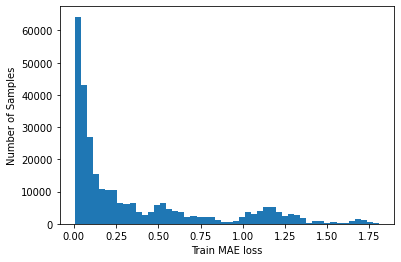

In [ ]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

In [ ]:
threshold = np.percentile(train_mae_loss, 90) 
print(f'Reconstruction error threshold: {threshold}')

Reconstruction error threshold: 1.1420364479549494


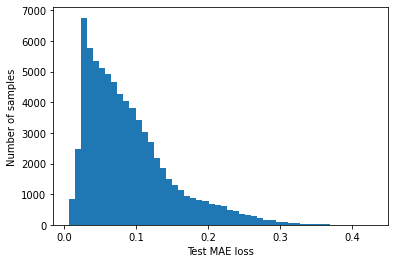

In [ ]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');